# `Business case: Logistics & Delivery Optimization for an E-Commerce Company`

# About E-Commerce Company

An E-Commerce Company is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Column Profiling:

data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination

is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np 
from numpy.random import seed
from numpy.random import randint
from numpy import mean
import datetime as dt 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
dh = pd.read_csv("data.csv")

In [3]:
dh.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
dh.shape

(144867, 24)

In [5]:
dh.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


*__Observations:__*

- Clearly, integer & floating value columns have no null values.

- All the columns here have large values of outliers.

In [6]:
dh.describe(include = 'object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [7]:
for col in dh:
    print(f'Number of unique in the {col} column:', dh[col].nunique(),'.')

Number of unique in the data column: 2 .
Number of unique in the trip_creation_time column: 14817 .
Number of unique in the route_schedule_uuid column: 1504 .
Number of unique in the route_type column: 2 .
Number of unique in the trip_uuid column: 14817 .
Number of unique in the source_center column: 1508 .
Number of unique in the source_name column: 1498 .
Number of unique in the destination_center column: 1481 .
Number of unique in the destination_name column: 1468 .
Number of unique in the od_start_time column: 26369 .
Number of unique in the od_end_time column: 26369 .
Number of unique in the start_scan_to_end_scan column: 1915 .
Number of unique in the is_cutoff column: 2 .
Number of unique in the cutoff_factor column: 501 .
Number of unique in the cutoff_timestamp column: 93180 .
Number of unique in the actual_distance_to_destination column: 144515 .
Number of unique in the actual_time column: 3182 .
Number of unique in the osrm_time column: 1531 .
Number of unique in the osrm_di

*__Observations__*:

    - Here we notice the columns data,route_type and is_cutoff consists of catagorical information where is_cutoff contains boolean values.

In [9]:
columns_list = list(dh.columns)
columns_list

['data',
 'trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'is_cutoff',
 'cutoff_factor',
 'cutoff_timestamp',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

In [10]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

The dataset(before transformation) has about 12 columns of objects, 10 columns of float values, 1 column of integers and lastly one column consisitng of boolean values.

# `DATA TRANSFORMATION`

In [11]:
# Converting columns' datatypes as category
dh['data'] = dh['data'].astype('category')
dh['route_type'] = dh['route_type'].astype('category')

In [12]:
dh.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [13]:
dh[dh["source_name"].isna()].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556


In [14]:
dh[dh["source_name"].isna()].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556


In [15]:
dh['source_name'].fillna('Missing',inplace=True)
dh['destination_name'].fillna('Missing',inplace=True)

In [15]:
# checking for duplicate values

In [17]:
print('The number of duplicated values in the dataset are', len(dh[dh.duplicated()]),'.')

The number of duplicated values in the dataset are 0 .


In [18]:
dh.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [19]:
#Source_City
dh['source_city'] = dh["source_name"].str.extract(r'([^_]+)')

#Source place
dh['source_place'] = dh["source_name"].str.split("_", n=2,expand = True)[1]

#Source code
dh["source_code"] = (dh["source_name"].str.split("_", n=2,expand = True)[2]).str.split(" ", n = 1, expand = True)[0]
                    
#Source state
dh['source_state'] = dh['source_name'].str.extract(r'.*\((.*)\).*')        
                     
#Destination City
dh['destination_city'] = dh['destination_name'].str.extract(r'([^_]+)')
                     
#Destination Place
dh['destination_place'] = dh['destination_name'].str.split("_", n = 2, expand = True)[1]
                     
#Destination code
dh['destination_code'] = (dh['destination_name'].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]

# Destination state
dh['destination_state'] = dh['destination_name'].str.extract(r'.*\((.*)\).*')

In [20]:
pd.set_option('display.max_columns', None)
dh

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip

In [21]:
# Creating a new column to save the time taken from order taken to order received
dh['trip_creation_time'] = dh['trip_creation_time'].astype('datetime64[ns]')
dh['od_end_time'] = dh['od_end_time'].astype('datetime64[ns]')
dh['od_start_time'] = dh['od_start_time'].astype('datetime64[ns]')

# Converting minutes into hours
dh['od_duration_in_hrs'] = (dh['od_end_time'] - dh['od_start_time']).dt.total_seconds()/3600

# Trip_creation_time: Extract features like month, year and day.
dh['start_scan_to_end_scan'] = dh['start_scan_to_end_scan']/60

# dh['trip_creation_year'] = dh['trip_creation_time'].dt.day
dh['trip_creation_month'] = dh['trip_creation_time'].dt.month_name()
dh['trip_creation_year'] = dh['trip_creation_time'].dt.year


In [22]:
# Dropping unknown columns from the dataset
dh.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1,inplace=True)

In [23]:
print('Number of columns in the dataset after creating new columns and dropping some columns: ',dh.shape[1])

Number of columns in the dataset after creating new columns and dropping some columns:  30


In [24]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [25]:
dh.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,144867,2018-09-22 13:34:23.659819264,2018-09-12 00:00:16.535741,2018-09-17 03:20:51.775845888,2018-09-22 04:24:27.932764928,2018-09-27 17:57:56.350054912,2018-10-03 23:59:42.701692,NaN
od_start_time,144867,2018-09-22 18:02:45.855230720,2018-09-12 00:00:16.535741,2018-09-17 08:05:40.886155008,2018-09-22 08:53:00.116656128,2018-09-27 22:41:50.285857024,2018-10-06 04:27:23.392375,NaN
od_end_time,144867,2018-09-23 10:04:31.395393024,2018-09-12 00:50:10.814399,2018-09-18 01:48:06.410121984,2018-09-23 03:13:03.520212992,2018-09-28 12:49:06.054018048,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,144867.0,16.02105,0.333333,2.683333,7.483333,27.233333,131.633333,17.283546
actual_distance_to_destination,144867.0,234.073372,9.000045,23.355874,66.126571,286.708875,1927.447705,344.990009
actual_time,144867.0,416.927527,9.0,51.0,132.0,513.0,4532.0,598.103621
osrm_time,144867.0,213.868272,6.0,27.0,64.0,257.0,1686.0,308.011085
osrm_distance,144867.0,284.771297,9.0082,29.9147,78.5258,343.19325,2326.1991,421.119294
segment_actual_time,144867.0,36.196111,-244.0,20.0,29.0,40.0,3051.0,53.571158
segment_osrm_time,144867.0,18.507548,0.0,11.0,17.0,22.0,1611.0,14.77596


In [26]:
dh.describe(include = 'object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,trip_creation_month
count,144867,144867,144867,144867,144867,144867,144867,142467,129924,144574,144867,142165,129038,144606,144867
unique,1504,14817,1508,1499,1481,1469,1263,1178,48,31,1259,1154,48,32,2
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,H,Karnataka,September
freq,1812,101,23347,23347,15192,15192,23665,23464,41177,27499,15393,15363,34584,21065,127349


In [27]:
dh.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1499
destination_center                  1481
destination_name                    1469
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
source_city                         1263
source_place                        1178
source_code                           48
source_state                          31
destination_city                    1259
destination_plac

In [28]:
columns_list = list(dh.columns)

In [29]:
for i in columns_list:
    print(f"Value counts for the column {i} :")
    print(dh[i].value_counts())
    print("________________________________________")

Value counts for the column data :
data
training    104858
test         40009
Name: count, dtype: int64
________________________________________
Value counts for the column trip_creation_time :
trip_creation_time
2018-09-28 05:23:15.359220    101
2018-10-02 06:05:53.086094    101
2018-09-27 04:47:19.425867    101
2018-09-22 04:55:04.835022    101
2018-09-29 05:04:57.639067    101
                             ... 
2018-09-27 18:08:18.207639      1
2018-09-28 17:31:07.690205      1
2018-09-29 14:56:33.655170      1
2018-09-19 04:35:44.776558      1
2018-09-14 17:04:32.989471      1
Name: count, Length: 14817, dtype: int64
________________________________________
Value counts for the column route_schedule_uuid :
route_schedule_uuid
thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e20

source_code
HB           41177
D            30004
H            26880
I             8464
IP            2768
H_1           2536
L             2108
DC            1944
DPC           1586
H_6           1513
I_2           1490
PC            1283
H_2           1082
C              879
D_1            830
D_2            703
DPP_1          551
DPP_2          497
I_1            435
P              391
I_7            381
CP             371
I_4            276
Dc             177
I_3            171
D_3            158
M              157
RP             151
I_20           129
H_4            126
V              111
I_21           111
DPP_3           95
Pc              92
Nagar_DPC       65
D_5             51
D_4             41
D_7             33
R_11            22
D_12            21
D_9             18
L_8             17
DPP_4            8
D_15             7
R_8              6
D_8              4
D_20             2
D_10             2
Name: count, dtype: int64
________________________________________
Value cou

In [30]:
for i in columns_list:
    print(f"Unique_counts for the column {i} :")
    print(dh[i].unique())
    print("________________________________________")

Unique_counts for the column data :
['training', 'test']
Categories (2, object): ['test', 'training']
________________________________________
Unique_counts for the column trip_creation_time :
<DatetimeArray>
['2018-09-20 02:35:36.476840', '2018-09-23 06:42:06.021680',
 '2018-09-14 15:42:46.437249', '2018-09-13 20:44:19.424489',
 '2018-09-29 22:21:45.149226', '2018-09-17 21:26:00.454695',
 '2018-09-12 01:33:48.711350', '2018-10-01 16:00:45.719099',
 '2018-09-27 14:16:14.819357', '2018-09-13 16:41:41.992300',
 ...
 '2018-09-13 20:47:45.942988', '2018-10-01 19:56:20.111591',
 '2018-09-23 01:31:09.129173', '2018-10-01 18:17:37.047270',
 '2018-09-26 14:05:52.096792', '2018-09-26 19:50:29.657378',
 '2018-09-14 18:45:34.164734', '2018-09-22 11:30:41.399439',
 '2018-09-17 11:35:28.838714', '2018-09-20 16:24:28.436231']
Length: 14817, dtype: datetime64[ns]
________________________________________
Unique_counts for the column route_schedule_uuid :
['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c

['September' 'October']
________________________________________
Unique_counts for the column trip_creation_year :
[2018]
________________________________________


In [31]:
for i in columns_list:
    print(f"Nunique_counts for the column {i} :")
    print(dh[i].nunique())
    print("________________________________________")

Nunique_counts for the column data :
2
________________________________________
Nunique_counts for the column trip_creation_time :
14817
________________________________________
Nunique_counts for the column route_schedule_uuid :
1504
________________________________________
Nunique_counts for the column route_type :
2
________________________________________
Nunique_counts for the column trip_uuid :
14817
________________________________________
Nunique_counts for the column source_center :
1508
________________________________________
Nunique_counts for the column source_name :
1499
________________________________________
Nunique_counts for the column destination_center :
1481
________________________________________
Nunique_counts for the column destination_name :
1469
________________________________________
Nunique_counts for the column od_start_time :
26369
________________________________________
Nunique_counts for the column od_end_time :
26369
________________________________

In [32]:
agg_dict_intermediate_dest = {
'data' : 'first',
'trip_creation_time' : 'first',
'route_type' : 'first',
'route_schedule_uuid' : 'first',
'source_center' : 'first',
'source_code' : 'first',
'source_city' : 'first',
'source_state' : 'first',
'source_name' : 'first',
'destination_center' : 'last',
'destination_code' : 'last',
'destination_city' : 'last',
'destination_state' : 'last',
'destination_name' : 'last',
'actual_distance_to_destination' : 'last',
'trip_creation_month':'first',
'trip_creation_year':'first'  
}

In [33]:
dh1 = dh.groupby('trip_uuid').agg(agg_dict_intermediate_dest).reset_index()

In [34]:
dh1.shape

(14817, 18)

In [35]:
dh_part1 = pd.DataFrame(dh.groupby('trip_uuid')['start_scan_to_end_scan'].unique().apply(sum).reset_index())

dh_part2 = pd.DataFrame(dh.groupby('trip_uuid')['od_duration_in_hrs'].unique().apply(sum).reset_index())

dh_part3 = pd.DataFrame(dh.groupby(['trip_uuid','od_duration_in_hrs'])['actual_time'].max().reset_index())
dh_part3 = pd.DataFrame(dh_part3.groupby('trip_uuid')['actual_time'].sum().reset_index())

dh_part4 = pd.DataFrame(dh.groupby(['trip_uuid','od_duration_in_hrs'])['osrm_time'].max().reset_index())
dh_part4 = pd.DataFrame(dh_part4.groupby('trip_uuid')['osrm_time'].sum().reset_index())

#Actual time and segment actual time
seg_time = pd.DataFrame(dh.groupby(['trip_uuid','od_duration_in_hrs'])['segment_actual_time'].sum().reset_index())
dh_part5 = pd.DataFrame(seg_time.groupby('trip_uuid')['segment_actual_time'].sum().reset_index())

# osrm distance and segment osrm distance
om_dist =pd.DataFrame(dh.groupby(['trip_uuid','od_duration_in_hrs'])['osrm_distance'].max().reset_index())
dh_part6= pd.DataFrame(om_dist.groupby('trip_uuid')['osrm_distance'].sum().reset_index())
dh_part7 = pd.DataFrame(dh.groupby('trip_uuid')['segment_osrm_distance'].sum().reset_index())

# osrm time ans segment osrm time
dh_part8 = pd.DataFrame(dh.groupby('trip_uuid')['segment_osrm_time'].sum().reset_index())

In [36]:
print(dh_part1.shape)
print(dh_part2.shape)
print(dh_part3.shape)
print(dh_part4.shape)
print(dh_part5.shape)
print(dh_part6.shape)
print(dh_part7.shape)
print(dh_part8.shape)
print(dh1.shape)

(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 18)


In [37]:
dh1 = dh1.merge(dh_part1,on='trip_uuid')
dh1 = dh1.merge(dh_part2,on='trip_uuid')
dh1 = dh1.merge(dh_part3,on='trip_uuid')
dh1 = dh1.merge(dh_part4,on='trip_uuid')
dh1 = dh1.merge(dh_part5,on='trip_uuid')
dh1 = dh1.merge(dh_part6,on='trip_uuid')
dh1 = dh1.merge(dh_part7,on='trip_uuid')
dh1 = dh1.merge(dh_part8,on='trip_uuid')

In [38]:
dh1.shape

(14817, 26)

In [39]:
dh = dh1.copy(deep = True)

In [40]:
dh['week'] = dh['trip_creation_time'].dt.day_name()
dh['hour'] = dh['trip_creation_time'].dt.hour
dh['date'] = dh['trip_creation_time'].dt.date

####  ------------------------------------------------------------Data Transformation Ends-----------------------------------------------------------------------

## `DATA VISUALIZATION`

In [41]:
pd.set_option('display.max_columns', None)
dh.head()

,trip_uuid,data,trip_creation_time,route_type,route_schedule_uuid,source_center,source_code,source_city,source_state,source_name,destination_center,destination_code,destination_city,destination_state,destination_name,actual_distance_to_destination,trip_creation_month,trip_creation_year,start_scan_to_end_scan,od_duration_in_hrs,actual_time,osrm_time,segment_actual_time,osrm_distance,segment_osrm_distance,segment_osrm_time,week,hour,date
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,IND462022AAA,H,Bhopal,Madhya Pradesh,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,HB,Gurgaon,Haryana,Gurgaon_Bilaspur_HB (Haryana),383.759164,September,2018,37.650000,37.668497,1562.0,743.0,1548.0,991.3523,1320.4733,1008.0,Wednesday,0,2018-09-12
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND572101AAA,I,Tumkur,Karnataka,Tumkur_Veersagr_I (Karnataka),IND562101AAA,D,Chikblapur,Karnataka,Chikblapur_ShntiSgr_D (Karnataka),24.644021,September,2018,3.000000,3.026865,143.0,68.0,141.0,85.1110,84.1894,65.0,Wednesday,0,2018-09-12
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,IND562132AAA,H,Bangalore,Karnataka,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,H,Chandigarh,Punjab,Chandigarh_Mehmdpur_H (Punjab),237.439610,September,2018,65.550000,65.572709,3347.0,1741.0,3308.0,2372.0852,2545.2678,1941.0,Wednesday,0,2018-09-12
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,None,Mumbai Hub (Maharashtra),Maharashtra,Mumbai Hub (Maharashtra),IND401104AAA,IP,Mumbai,Maharashtra,Mumbai_MiraRd_IP (Maharashtra),17.175274,September,2018,1.666667,1.674916,59.0,15.0,59.0,19.6800,19.8766,16.0,Wednesday,0,2018-09-12
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,D,Bellary,Karnataka,Bellary_Dc (Karnataka),IND583101AAA,D,Bellary,Karnataka,Bellary_Dc (Karnataka),41.317614,September,2018,11.950000,11.972484,341.0,117.0,340.0,146.7918,146.7919,115.0,Wednesday,0,2018-09-12


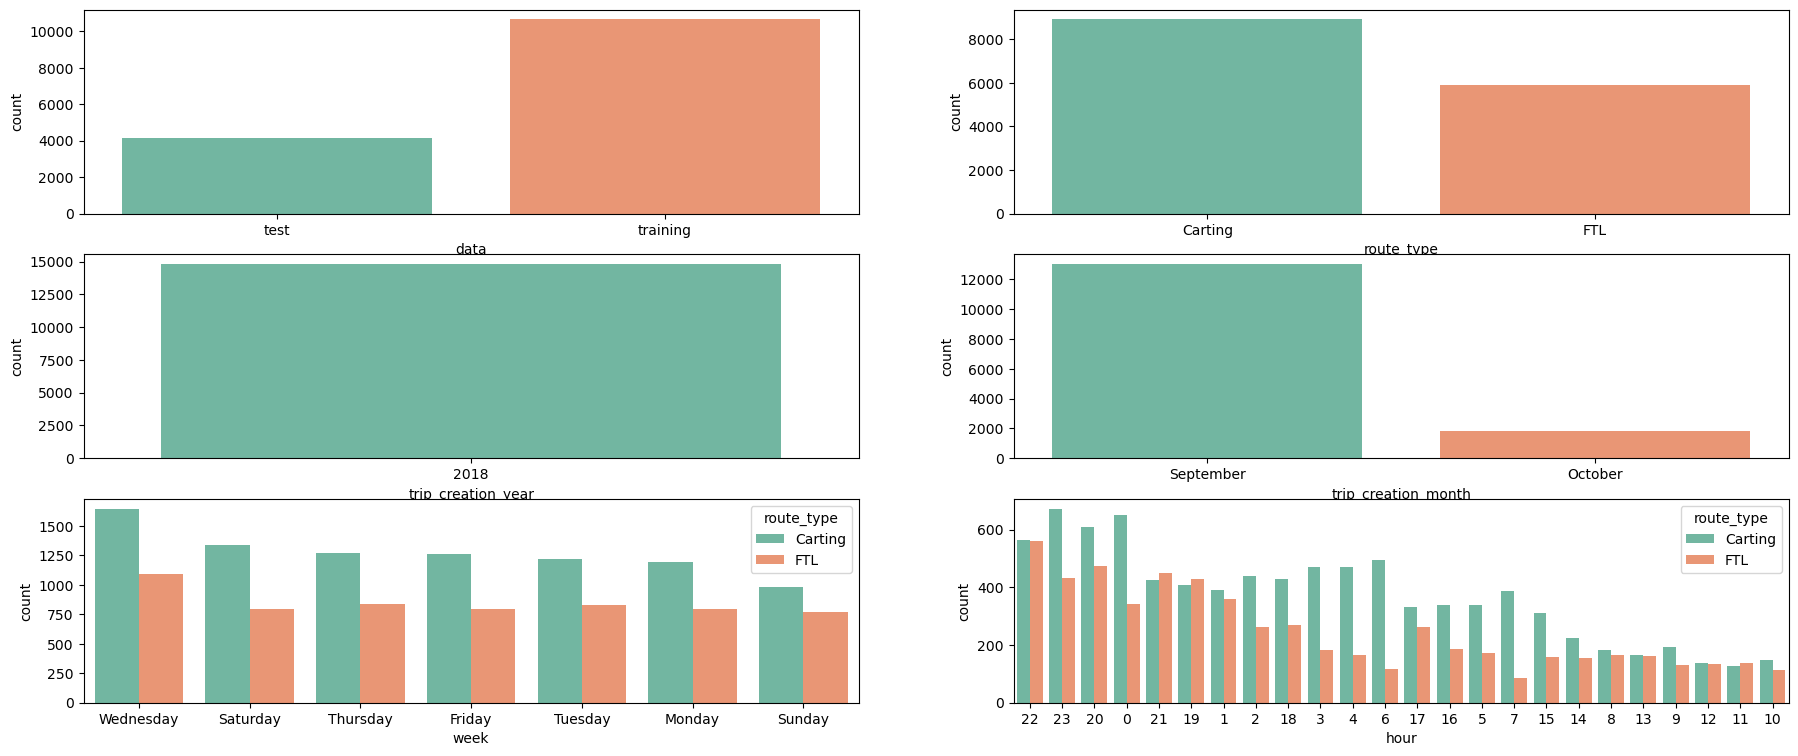

In [42]:
plt.figure(figsize=(22,9))
plt.subplot(3,2,1)
sns.countplot(x = dh.data, palette = 'Set2')

plt.subplot(3,2,2)
sns.countplot(x = dh.route_type, palette= 'Set2')

plt.subplot(3,2,3)
sns.countplot(x=dh.trip_creation_year,palette='Set2')

plt.subplot(3,2,4)
sns.countplot(x=dh.trip_creation_month,palette='Set2')

plt.subplot(3,2,5)
sns.countplot(x=dh.week,palette='Set2',order=dh.week.value_counts().index,hue=dh.route_type)

plt.subplot(3,2,6)
sns.countplot(x=dh.hour,palette='Set2',order=dh.hour.value_counts().index,hue=dh.route_type)
plt.show()

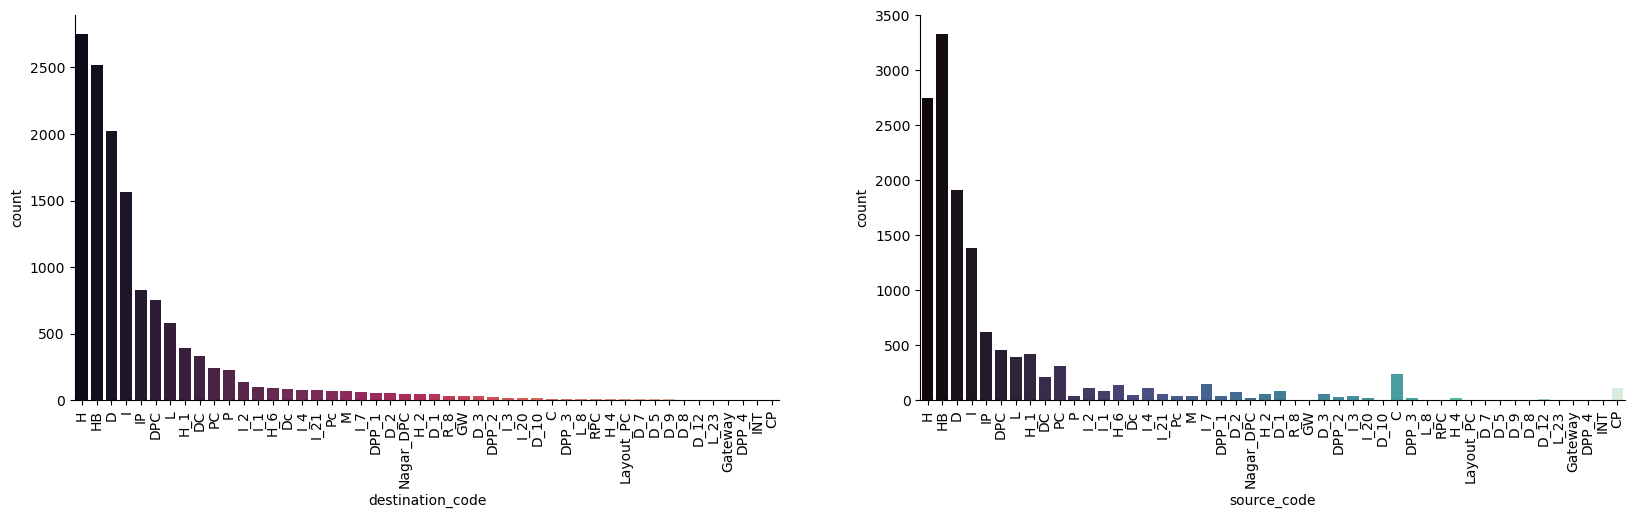

In [43]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x = dh.destination_code, palette='rocket', order = dh['destination_code'].value_counts().index)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x = dh.source_code, palette="mako", order = dh['destination_code'].value_counts().index)
plt.xticks(rotation = 90)
sns.despine()
plt.show()

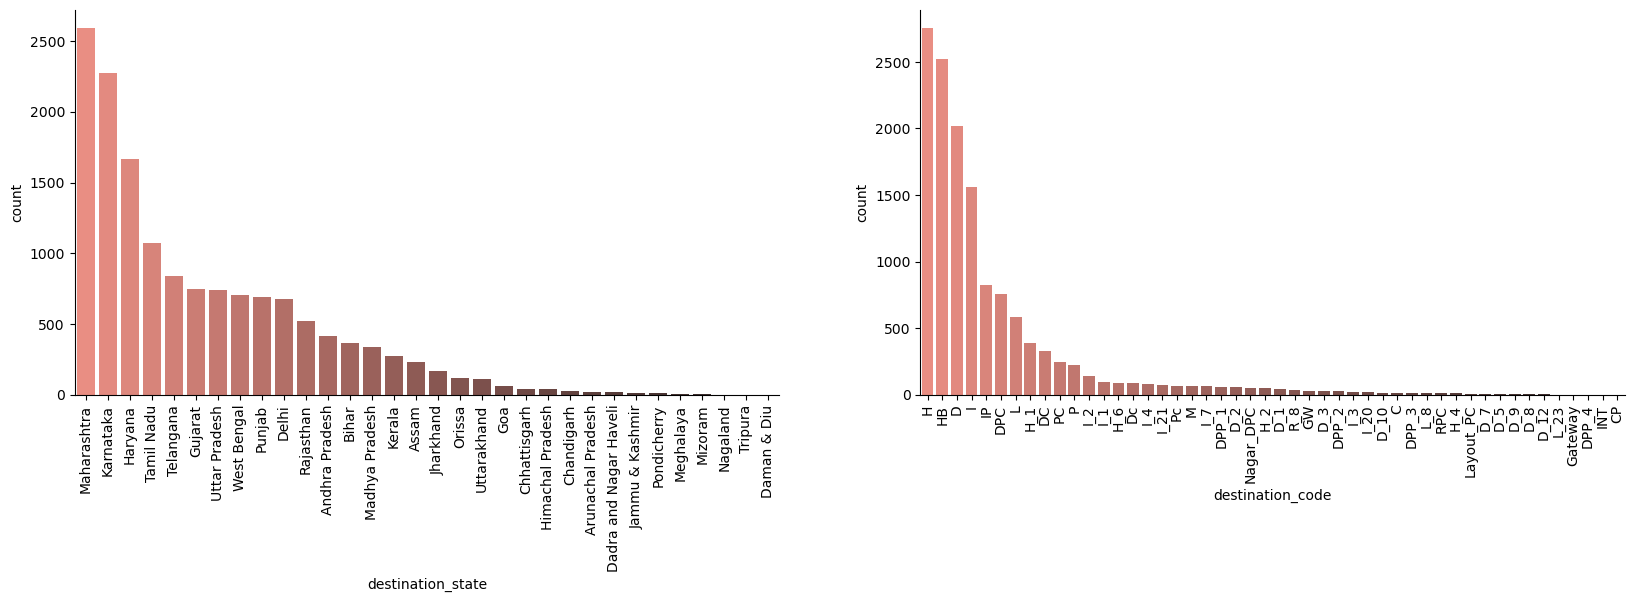

In [44]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x = dh.destination_state, palette="dark:salmon_r", order = dh['destination_state'].value_counts().index)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x = dh.destination_code, palette="dark:salmon_r", order =  dh['destination_code'].value_counts().index)
plt.xticks(rotation=90)
sns.despine()
plt.show()

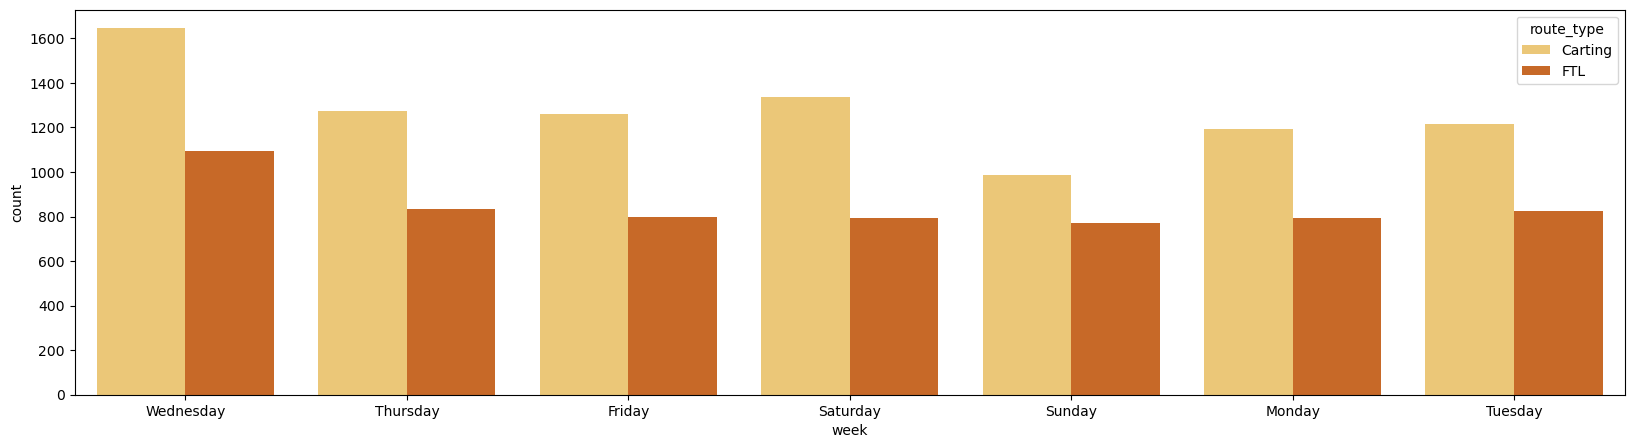

In [45]:
plt.figure(figsize=(20,5))
sns.countplot(x = dh.week, hue = dh.route_type, palette="YlOrBr")
plt.show()

In [46]:
number_dh = dh.select_dtypes('float64')
number_dh.shape

(14817, 9)

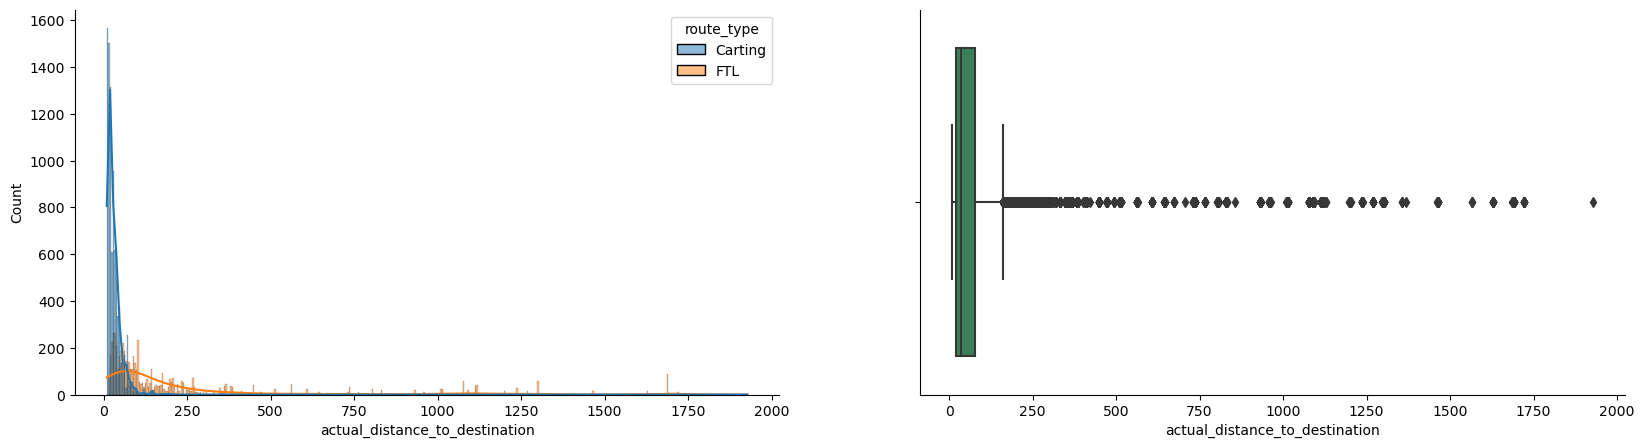

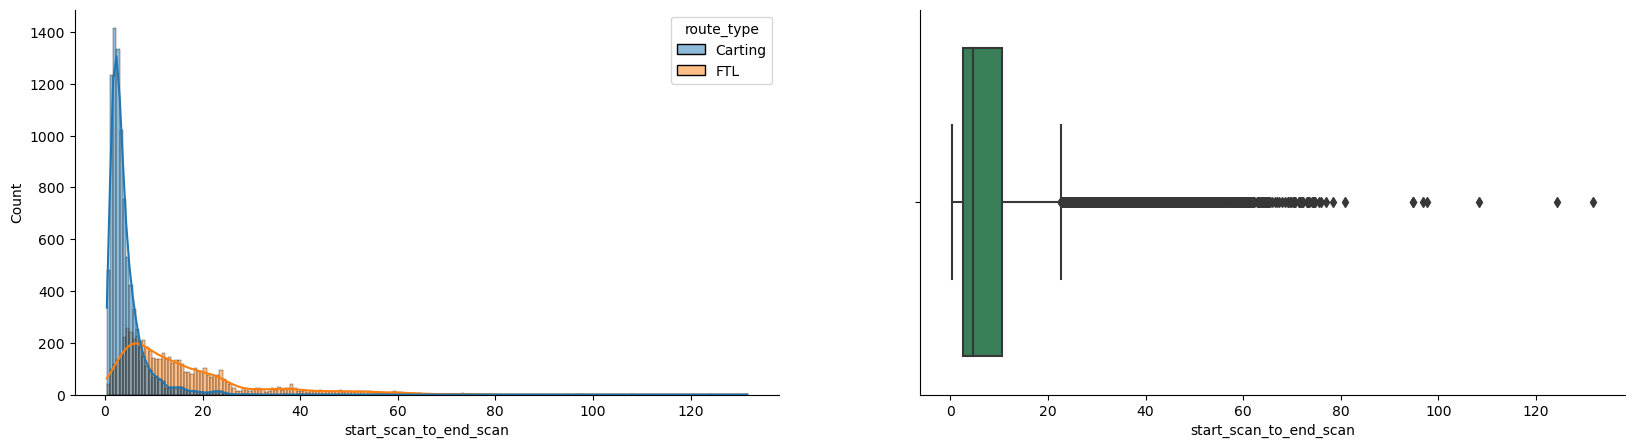

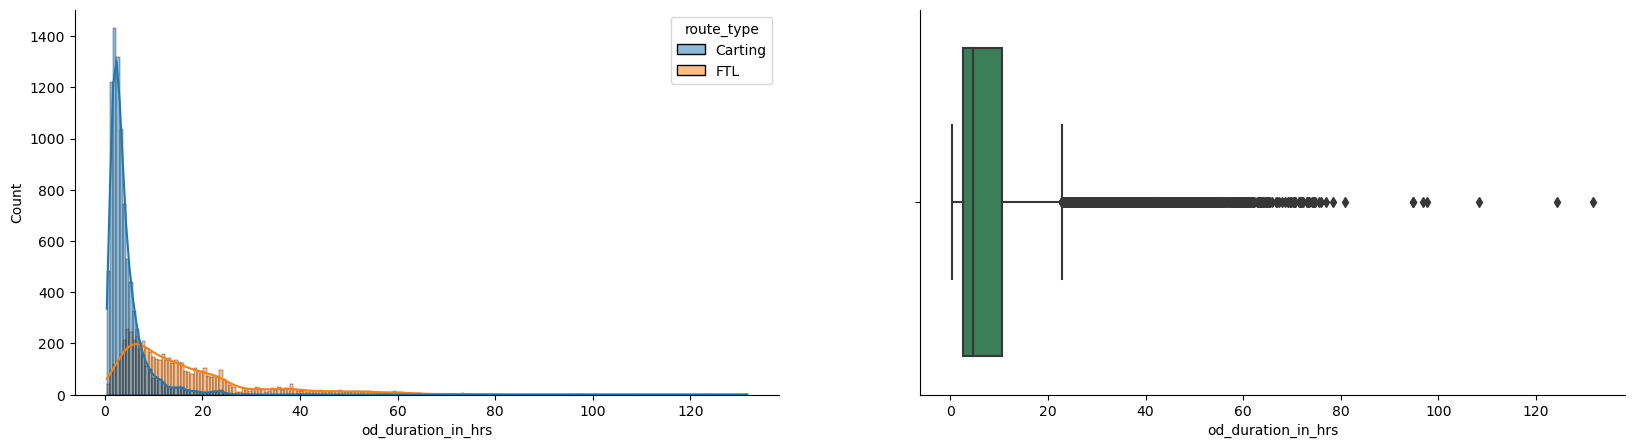

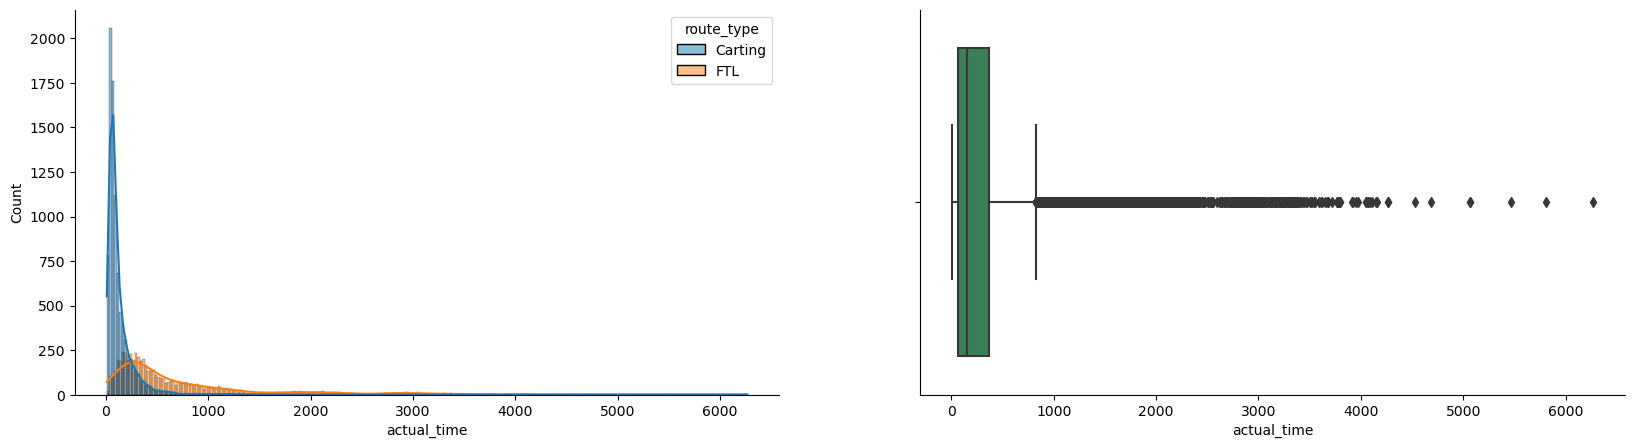

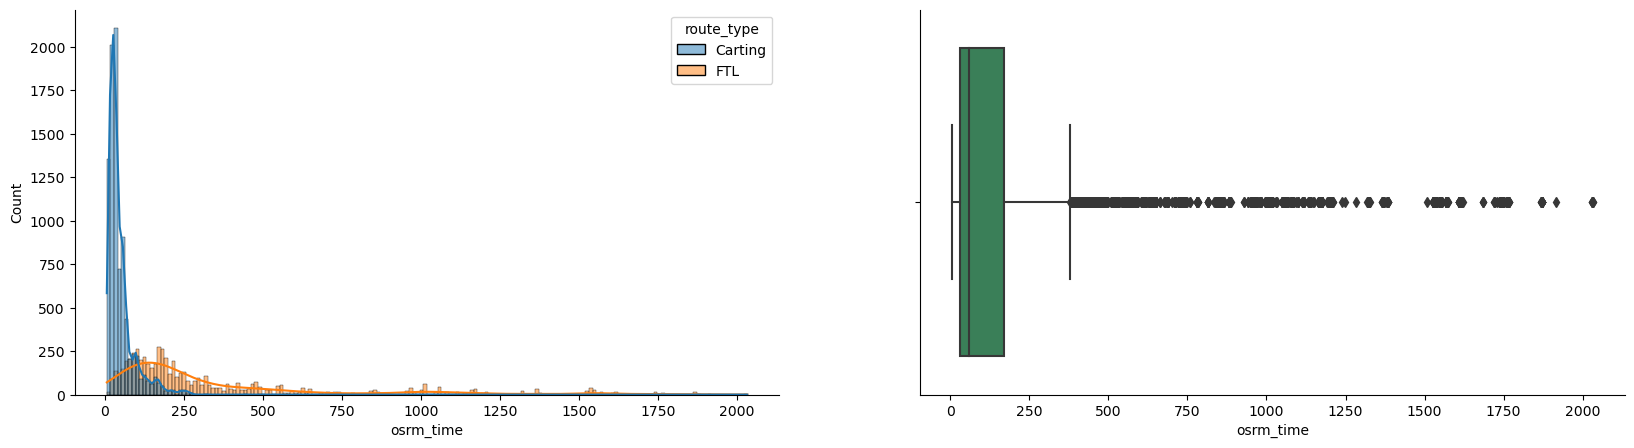

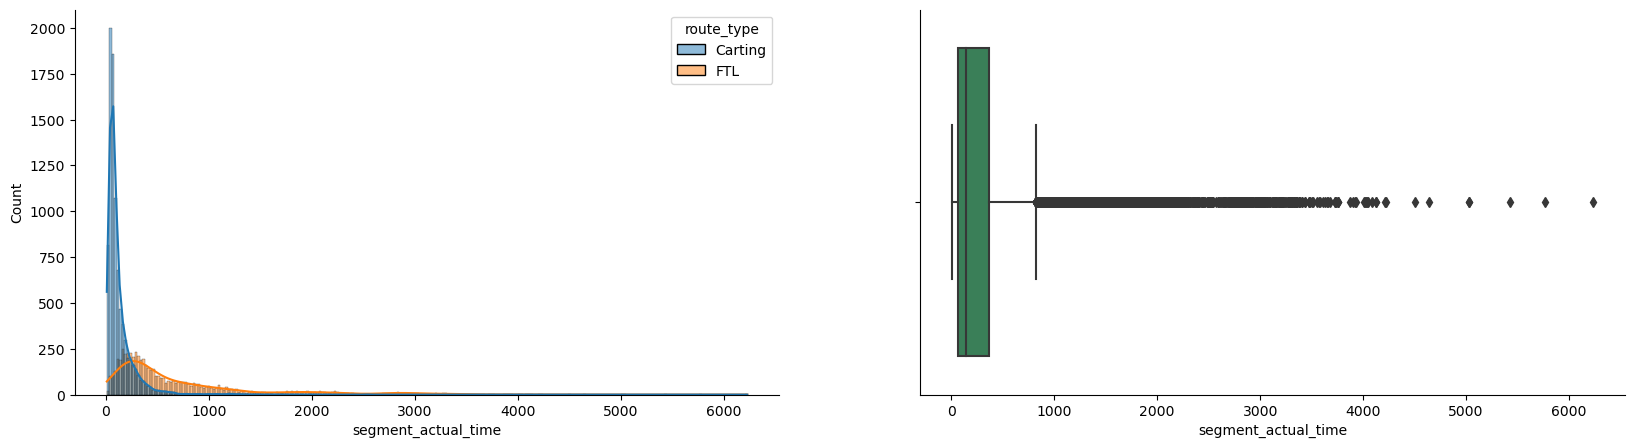

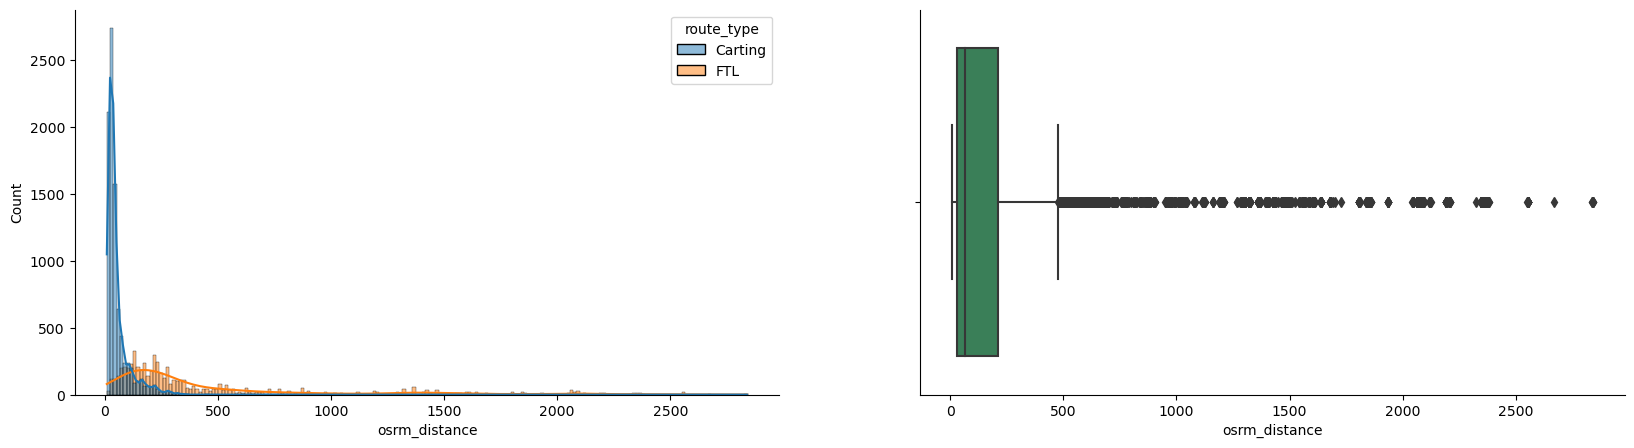

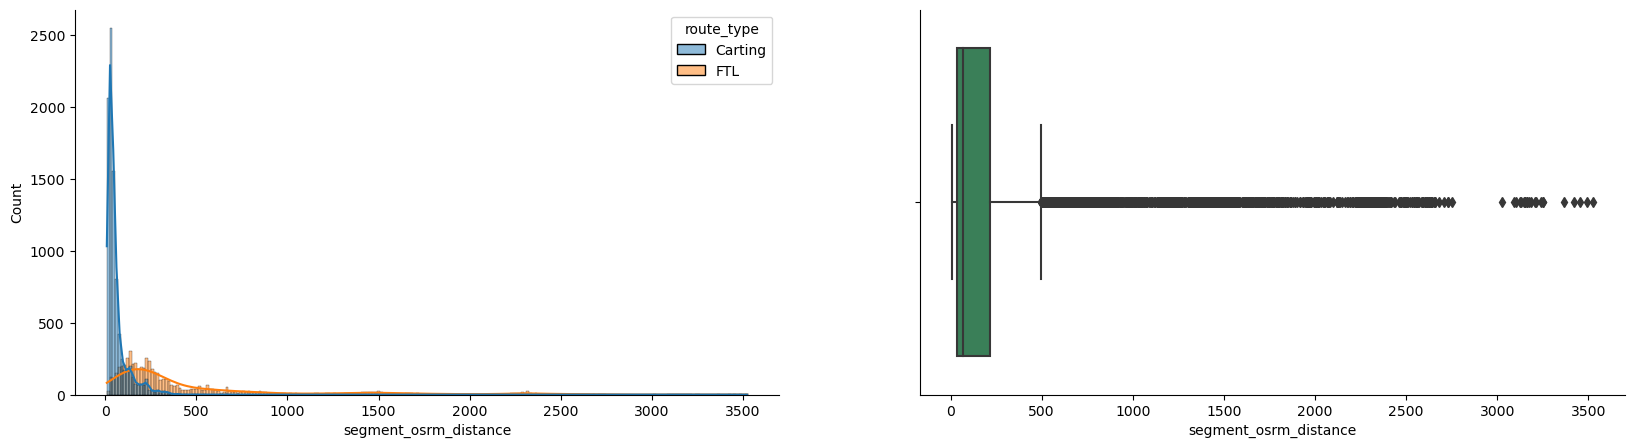

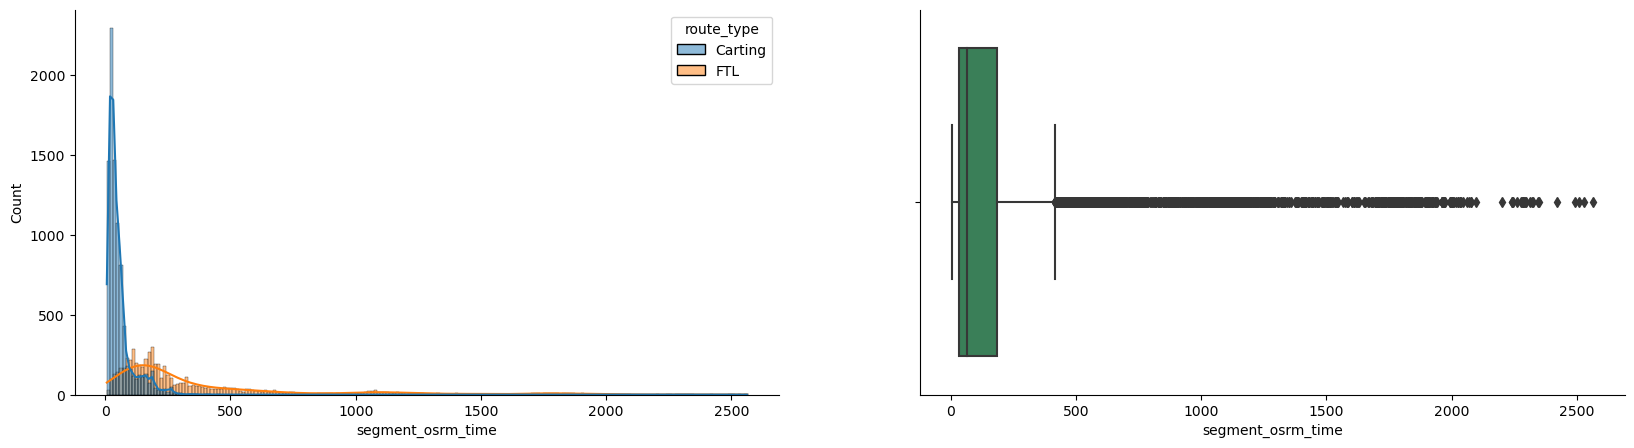

In [47]:
for i in number_dh.columns:
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    sns.histplot(x = number_dh[i], kde = True, hue = dh.route_type)
    plt.subplot(1,2,2)
    sns.boxplot(x = number_dh[i], color = 'seagreen')
    sns.despine()
    plt.show()

`Observations:-`
- it can be observed that start_scan_to_end_scan has completely shadowed od_duration as they share a perfect correlation.
- it can be noticed that actual_distance and osrm_distance are almost perfectly correlated.

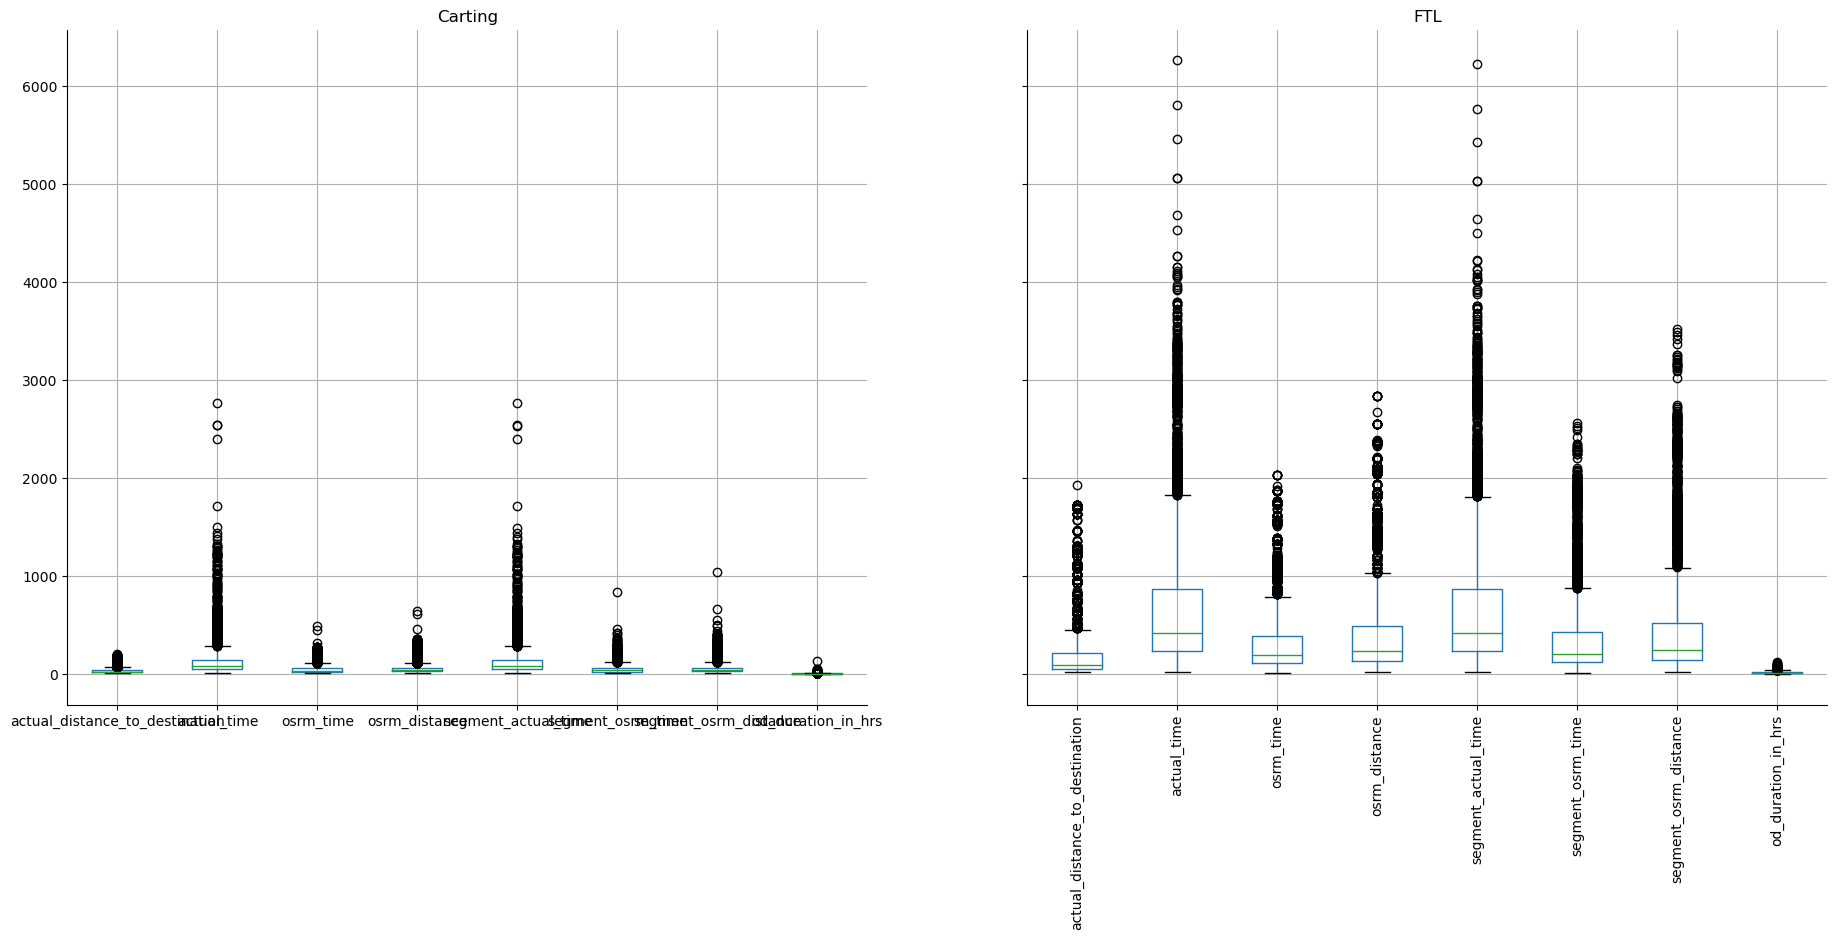

In [48]:
dh.groupby('route_type').boxplot(column = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_duration_in_hrs'],figsize=(22,9))
plt.xticks(rotation = 90)
sns.despine()
plt.show()

`Observations:-`
- it can be clearly seen that delivery through FTL routing far better that Carting in many aspects.
- although FTL routing performs similiar to Carting in od_duration_in_hrs.

# `HYPOTHESIS TESTING`

## `Hypothesis 1:`

###  Statement: Compare the difference between Point a. and start_scan_to_end_scan. 

In [49]:
hypo_1 = dh.start_scan_to_end_scan
hypo_2 = dh.od_duration_in_hrs
hypo_1_1_log = np.log(hypo_1)
hypo_1_2_log = np.log(hypo_2)

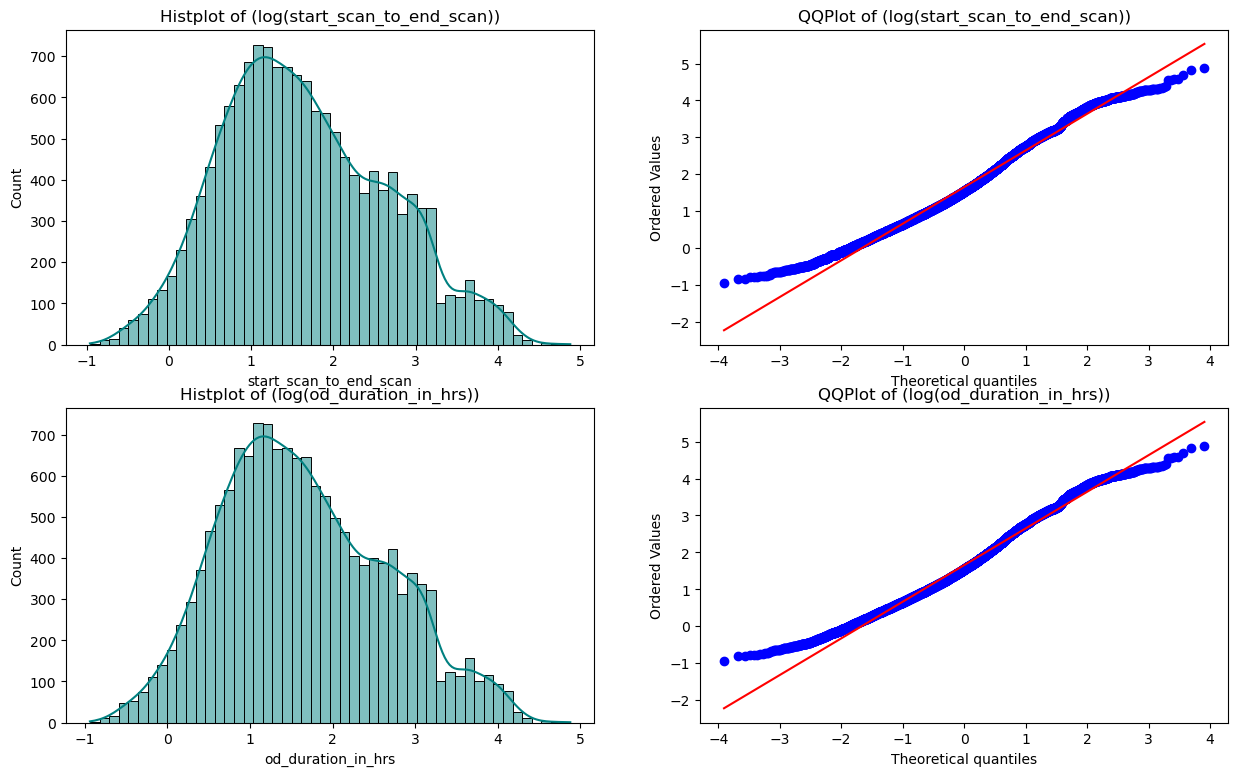

In [50]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_1_1_log, bins=50, kde=True, color = 'teal')
plt.title('Histplot of (log(start_scan_to_end_scan))')

ax = fig.add_subplot(222)
stats.probplot(hypo_1_1_log, dist = 'norm', plot = plt)
plt.title('QQPlot of (log(start_scan_to_end_scan))')

ax = fig.add_subplot(223)
sns.histplot(hypo_1_2_log, bins=50, kde=True, color = 'teal')
plt.title('Histplot of (log(od_duration_in_hrs))')

ax = fig.add_subplot(224)
stats.probplot(hypo_1_2_log, dist = 'norm', plot = plt)
plt.title('QQPlot of (log(od_duration_in_hrs))')
plt.show()

__Step 1: Defining the null and Altenate Hypothesis__

H0: start_scan_to_end_scan and od_duration_in_hrs have the same mean.

H1: start_scan_to_end_scan and od_duration_in_hrs does not have the same mean

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.


In [51]:
a = dh['start_scan_to_end_scan'].sample(1000)
b = dh['od_duration_in_hrs'].sample(10000)
print('The standard deviation of the sample of start_scan_to_end_scan is',a.std(),'.')
print('The standard deviation of the sample of od_duration_in_hrs is',b.std(),'.')

The standard deviation of the sample of start_scan_to_end_scan is 11.140954615817096 .
The standard deviation of the sample of od_duration_in_hrs is 10.960791857512872 .


__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.05.

__Step 4: Calculating the p_value__

In [52]:
hypo1 = dh.start_scan_to_end_scan
hypo2 = dh.od_duration_in_hrs

In [53]:
for i in range(5):
    print(stats.ttest_ind(np.log(hypo1).sample(10000),np.log(hypo2).sample(10000)))
    print()

Ttest_indResult(statistic=-0.13979259248673753, pvalue=0.8888252739502472)

Ttest_indResult(statistic=-0.07654572744470739, pvalue=0.938985701154301)

Ttest_indResult(statistic=-0.6170323892588258, pvalue=0.537220387049069)

Ttest_indResult(statistic=-0.8433671592180085, pvalue=0.3990332202557616)

Ttest_indResult(statistic=-0.6912049510390138, pvalue=0.4894447763027807)



__Step 5: Conclussion__

Multiple t-tests have been done, as observed, p_value > the alpha or significance value.

Hence, we fail to reject the null Hypothesis.

## Hypothesis 2
### Statement: Hypothesis Testing on actual_time aggregated value and OSRM time aggregated value 

In [54]:
hypo_3 = dh.actual_time
hypo_4 = dh.osrm_time
hypo_2_1_log = np.log(hypo_3)
hypo_2_2_log = np.log(hypo_4)

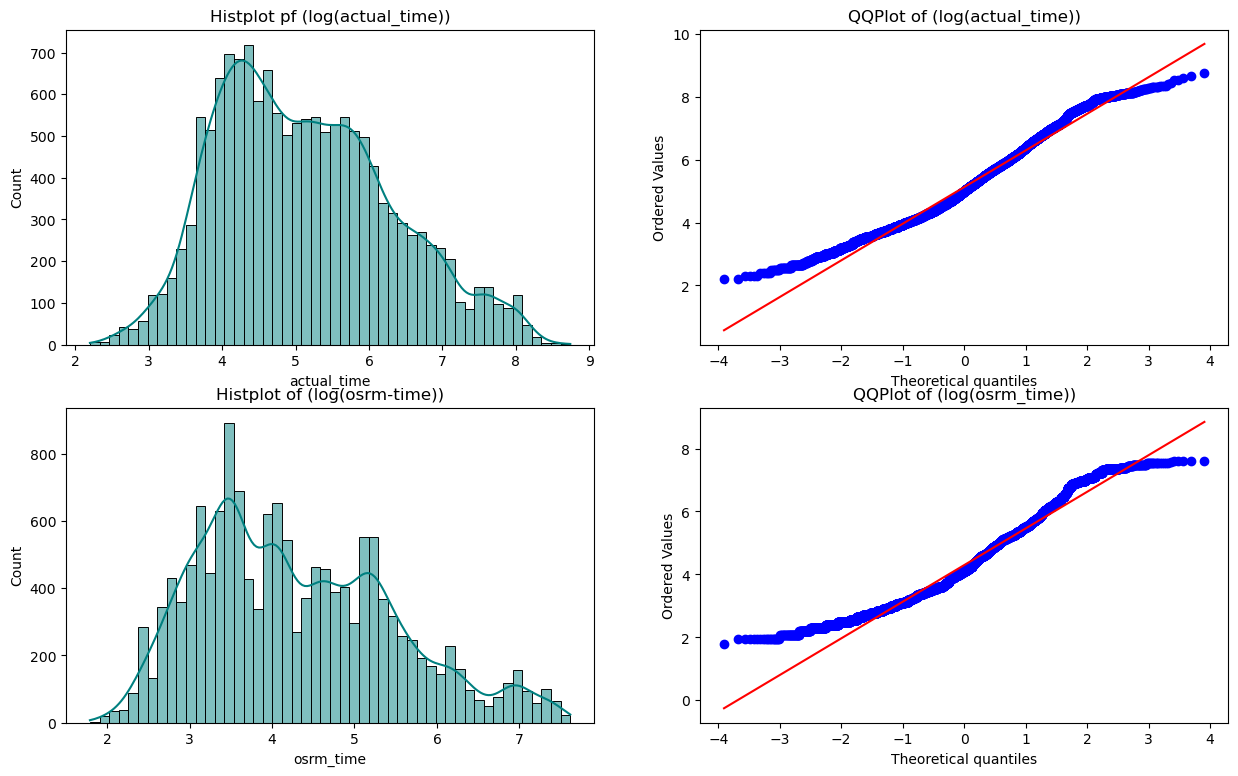

In [55]:
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_2_1_log, bins = 50, kde = True, color = 'teal')
plt.title('Histplot pf (log(actual_time))')

ax = fig.add_subplot(222)
stats.probplot(hypo_2_1_log, dist = 'norm', plot = plt)
plt.title('QQPlot of (log(actual_time))')

ax = fig.add_subplot(223)
sns.histplot(hypo_2_2_log, bins = 50, kde = True, color = 'teal')
plt.title('Histplot of (log(osrm-time))')

ax = fig.add_subplot(224)
stats.probplot(hypo_2_2_log, dist = 'norm', plot = plt)
plt.title('QQPlot of (log(osrm_time))')
plt.show()

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.

Also performing a kruksal test that is a non-parametric method for testing whether samples originate from the same distribution.


In [56]:
a = dh['actual_time'].sample(1000)
b = dh['osrm_time'].sample(10000)
print('The standard deviation of the sample of actual_time sample is', a.std(),'.')
print('the standard deviation of the sample of osrm_time sample is', b.std(), '.')

The standard deviation of the sample of actual_time sample is 574.258040410386 .
the standard deviation of the sample of osrm_time sample is 271.18325274553405 .


__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.05.

__Step 4: Calculating the p_value__

In [57]:
for i in range(5):
    print(stats.ttest_ind(hypo_2_1_log.sample(5000),hypo_2_2_log.sample(5000)))
    print()

Ttest_indResult(statistic=35.96335110426237, pvalue=1.814975705755142e-266)

Ttest_indResult(statistic=36.13888737089426, pvalue=6.680909567130718e-269)

Ttest_indResult(statistic=33.80656825959183, pvalue=2.5730486634743905e-237)

Ttest_indResult(statistic=36.28359820875886, pvalue=6.477349942385827e-271)

Ttest_indResult(statistic=33.95249789783702, pvalue=3.038994465727619e-239)



__Step 5: Conclussion__

Multiple t-tests have been done, as observed, p_value > the alpha or significance value.


Hence, we fail to reject the null Hypothesis.

## Hypothesis 3
### Statement: HypothesisTesting between actual_time aggregated value and segment actual time aggregated value 

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

In [58]:
hypo_5 = dh.actual_time
hypo_6 = dh.segment_actual_time
hypo_3_1_log = np.log(hypo_5)
hypo_3_2_log = np.log(hypo_6)

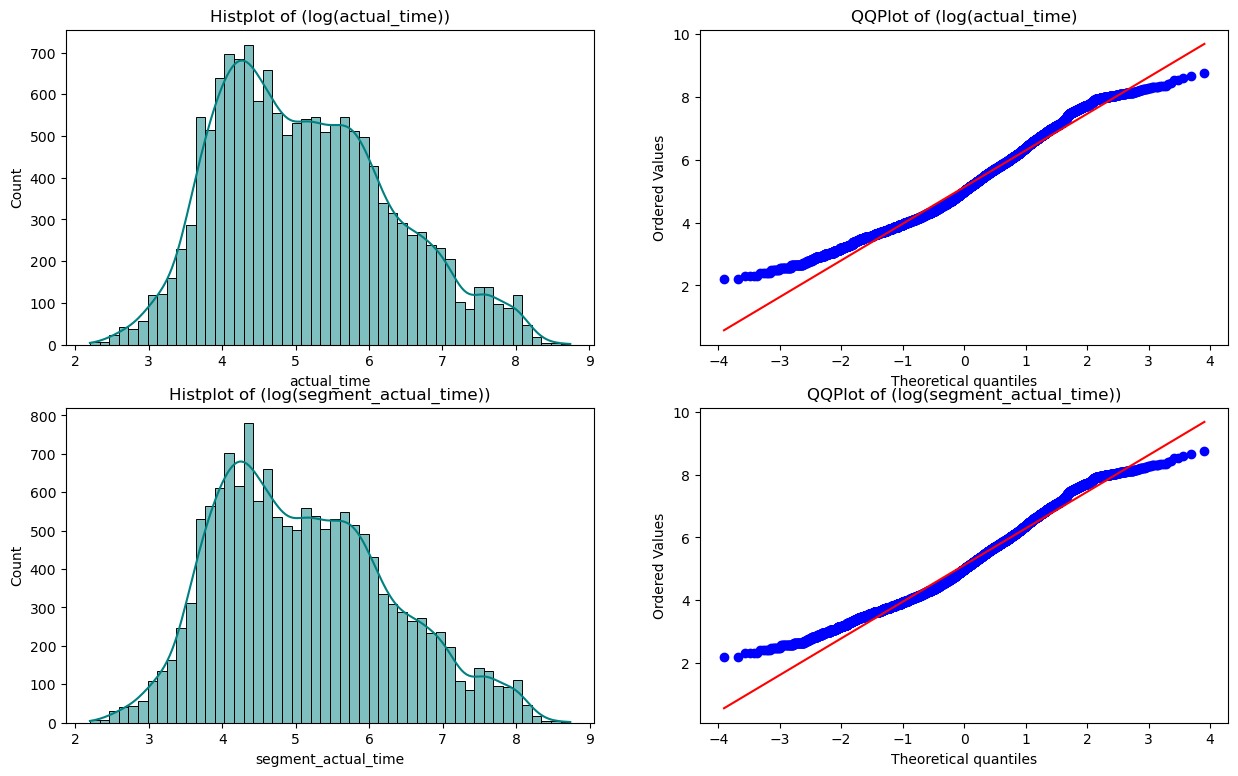

In [59]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_3_1_log, bins = 50, kde = True, color = 'teal')
plt.title('Histplot of (log(actual_time))')

ax = fig.add_subplot(222)
stats.probplot(hypo_3_1_log, dist = 'norm', plot = plt)
plt.title('QQPlot of (log(actual_time)')

ax = fig.add_subplot(223)
sns.histplot(hypo_3_2_log, bins = 50, kde = True, color = 'teal')
plt.title('Histplot of (log(segment_actual_time))')

ax = fig.add_subplot(224)
stats.probplot(hypo_3_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(segment_actual_time))')
plt.show()

__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [60]:
for i in range(5):
    print(stats.ttest_ind(hypo_3_1_log.sample(5000),hypo_3_2_log.sample(5000)))
    print()

Ttest_indResult(statistic=0.582724498894762, pvalue=0.5600919198845056)

Ttest_indResult(statistic=0.3110286573998539, pvalue=0.755785320122372)

Ttest_indResult(statistic=0.6808989839436692, pvalue=0.49595117976981473)

Ttest_indResult(statistic=-0.47018358518146997, pvalue=0.6382341163420453)

Ttest_indResult(statistic=-0.4592833447452679, pvalue=0.6460406917300945)



__Step 5: Conclusion__

Multiple t-tests have been done, as observed, p_value > the alpha or significance value.


Hence, we fail to reject the null Hypothesis.

## Hypothesis 4
### Statement: HypothesisTesting between osrm distance aggregated value and segment osrm distance aggregated value

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

In [61]:
hypo_7 = dh.osrm_distance
hypo_8 = dh.segment_osrm_distance
hypo_4_1_log = np.log(hypo_7)
hypo_4_2_log = np.log(hypo_8)

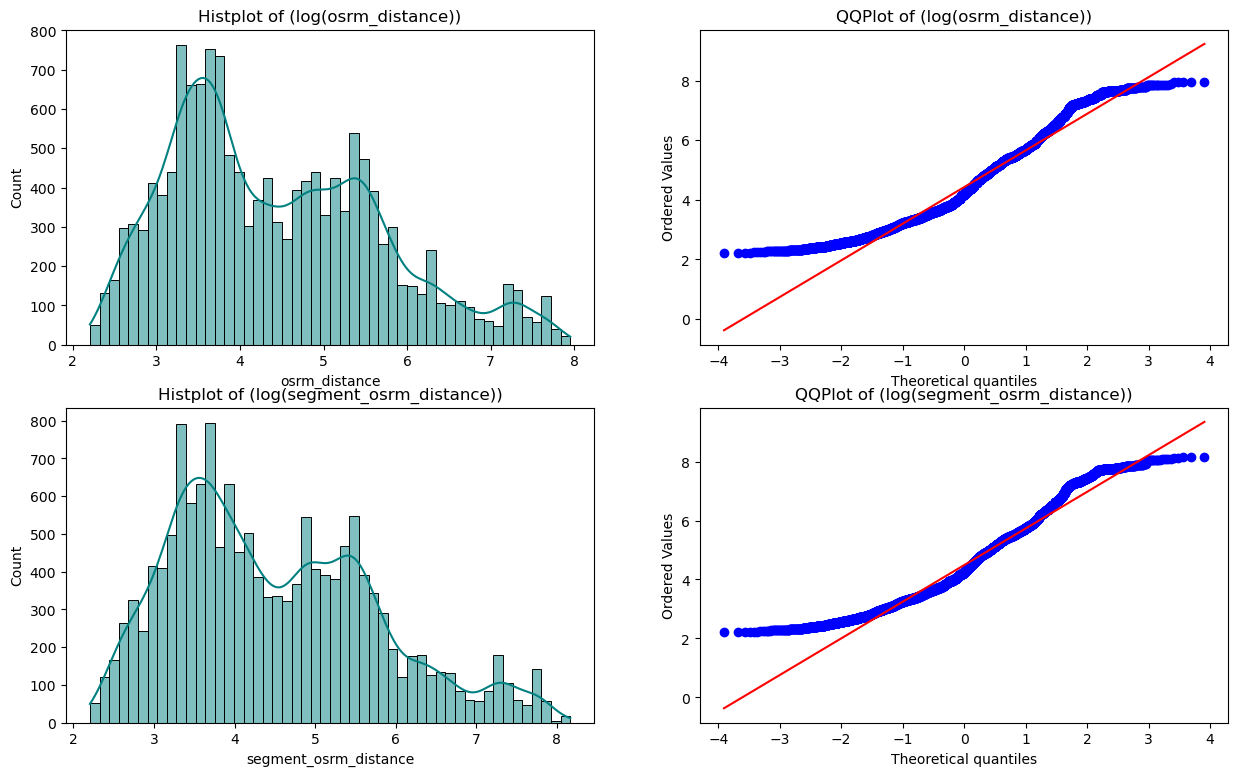

In [62]:
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_4_1_log, bins = 50, kde = True, color = 'teal')
plt.title('Histplot of (log(osrm_distance))')

ax = fig.add_subplot(222)
stats.probplot(hypo_4_1_log, dist = 'norm', plot = plt)
plt.title('QQPlot of (log(osrm_distance))')

ax = fig.add_subplot(223)
sns.histplot(hypo_4_2_log,bins=50, kde=True,color='teal')
plt.title('Histplot of (log(segment_osrm_distance))')

ax = fig.add_subplot(224)
stats.probplot(hypo_4_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(segment_osrm_distance))')
plt.show()

__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [63]:
for i in range(7):
    print(stats.ttest_ind(hypo_4_1_log.sample(10000) , hypo_4_2_log.sample(10000)))
    print()

Ttest_indResult(statistic=-4.389015928447228, pvalue=1.1444791209054216e-05)

Ttest_indResult(statistic=-3.53533630605605, pvalue=0.00040817670107792987)

Ttest_indResult(statistic=-3.2706175291675965, pvalue=0.0010749449237169952)

Ttest_indResult(statistic=-3.4256136047116756, pvalue=0.0006146446309248596)

Ttest_indResult(statistic=-4.2083626756265335, pvalue=2.5834989112707772e-05)

Ttest_indResult(statistic=-3.2028553666570336, pvalue=0.0013628538103156048)

Ttest_indResult(statistic=-3.7760011365817965, pvalue=0.00015982729413496066)



__Step 5: Conclusion__

Multiple t-tests have been done, as observed, p_value < the alpha or significance value.


Hence, we reject the null Hypothesis.

## Hypothesis 5
### Statement: HypothesisTesting between osrm time aggregated value and segment osrm time aggregated value

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.

In [64]:
hypo_5_1_log = np.log(dh.osrm_time)
hypo_5_2_log = np.log(dh.segment_osrm_time)

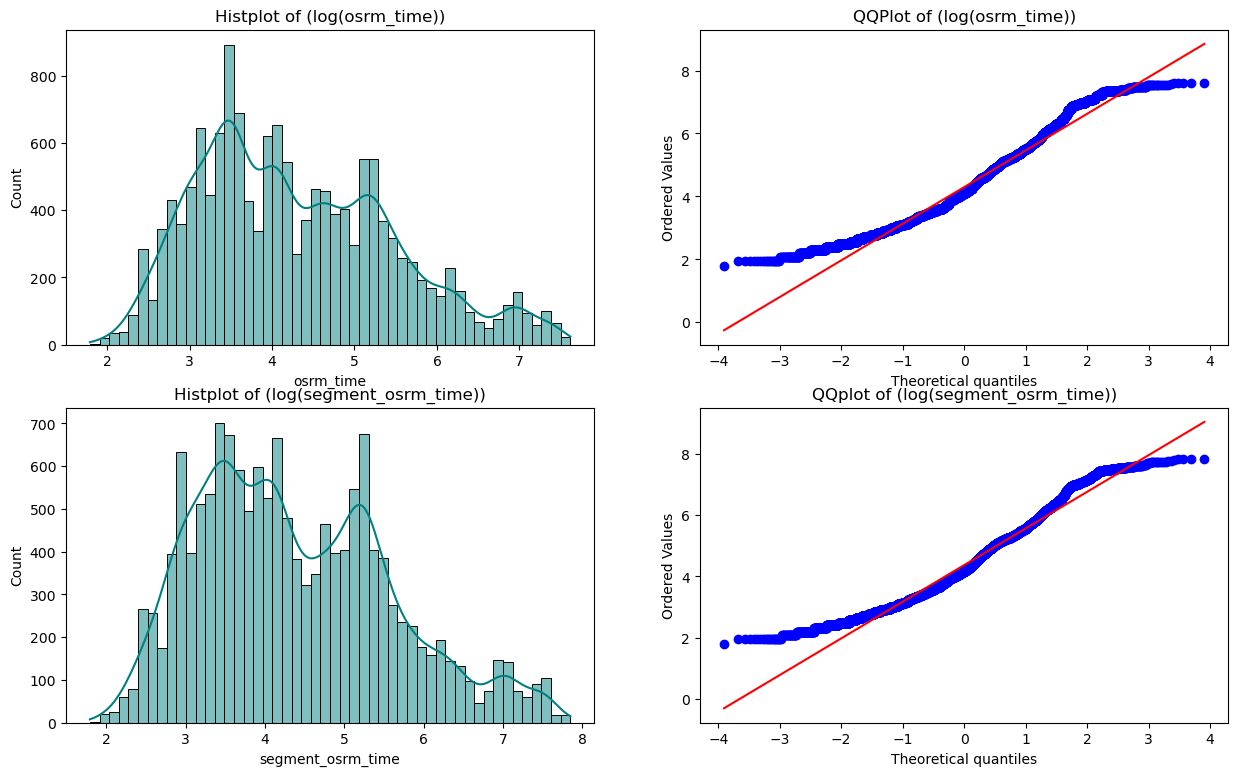

In [65]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_5_1_log, bins = 50, kde = True, color = 'teal')
plt.title('Histplot of (log(osrm_time))')

ax = fig.add_subplot(222)
stats.probplot(hypo_5_1_log, dist = 'norm', plot = plt)
plt.title('QQPlot of (log(osrm_time))')

ax = fig.add_subplot(223)
sns.histplot(hypo_5_2_log, bins = 50, kde = True, color = 'teal')
plt.title('Histplot of (log(segment_osrm_time))')

ax = fig.add_subplot(224)
stats.probplot(hypo_5_2_log, dist = 'norm', plot = plt)
plt.title('QQplot of (log(segment_osrm_time))')
plt.show()

__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [66]:
for i in range(7):
    print(stats.ttest_ind(hypo_5_1_log.sample(10000), hypo_5_2_log.sample(10000)))
    print()

Ttest_indResult(statistic=-4.777118329540385, pvalue=1.7908621768387808e-06)

Ttest_indResult(statistic=-4.298503989790962, pvalue=1.7276808686874005e-05)

Ttest_indResult(statistic=-4.325917249371099, pvalue=1.5263452149536158e-05)

Ttest_indResult(statistic=-3.9199790940845816, pvalue=8.885170070371248e-05)

Ttest_indResult(statistic=-4.757134546100924, pvalue=1.9773050307275186e-06)

Ttest_indResult(statistic=-3.7485801466622357, pvalue=0.00017833905238394583)

Ttest_indResult(statistic=-3.326738287754272, pvalue=0.0008802718016754367)



__Step 5: Conclusion__

Multiple t-tests have been done, as observed, p_value < the alpha or significance value.


Hence, we  reject the null Hypothesis.

# `NON-GRAPHICAL ANALYSIS`

In [67]:
# Top-5 Source States & Their Percentage Contribution
dh.source_state.value_counts(normalize = True)[:6]*100

source_state
Maharashtra    18.113055
Karnataka      15.053691
Haryana        11.372999
Tamil Nadu      7.327615
Delhi           5.355575
Telangana       5.267779
Name: proportion, dtype: float64

In [68]:
# Top-5 Destiantion States & Their Percentage Contribution
dh.destination_state.value_counts(normalize = True)[:6]*100

destination_state
Maharashtra    17.496117
Karnataka      15.369032
Haryana        11.256668
Tamil Nadu      7.238841
Telangana       5.658721
Gujarat         5.037477
Name: proportion, dtype: float64

In [69]:
#  Top-5 Source City & Their Percentage Contribution
dh.source_city.value_counts(normalize = True)[:6]*100

source_city
Gurgaon      6.910981
Bengaluru    6.850240
Bhiwandi     5.473443
Bangalore    5.095498
Delhi        4.184383
Mumbai       3.907674
Name: proportion, dtype: float64

In [70]:
# Top-5 Destiantion City & Their Percentage Contribution
dh.destination_city.value_counts(normalize = True)[:6]*100

destination_city
Bengaluru    7.126949
Mumbai       6.013363
Gurgaon      5.864885
Bangalore    4.359857
Hyderabad    4.251873
Bhiwandi     4.076399
Name: proportion, dtype: float64

In [71]:
# Top-5 Intrastate Source & Destination States & Their Percentage Contribution
intrastate = dh[dh['source_state'] == dh['destination_state']]
intrastate.source_state.value_counts(normalize = True)[:6]*100

source_state
Maharashtra    20.440065
Karnataka      17.118342
Tamil Nadu      8.631382
Haryana         7.399541
Telangana       5.564523
Gujarat         5.301164
Name: proportion, dtype: float64

In [72]:
intrastate.destination_state.value_counts(normalize = True)[:6]*100

destination_state
Maharashtra    20.440065
Karnataka      17.118342
Tamil Nadu      8.631382
Haryana         7.399541
Telangana       5.564523
Gujarat         5.301164
Name: proportion, dtype: float64

In [73]:
#  Top-5  Source City For Intrastate Packages & Their Percentage Contribution 
intrastate.source_city.value_counts(normalize=True)[:6]*100

source_city
Bengaluru    8.520941
Bhiwandi     5.403109
Bangalore    5.029309
Mumbai       4.918868
Hyderabad    3.729505
Pune         3.109337
Name: proportion, dtype: float64

In [74]:
#  Top-4 Destination City For Intrastate Packages & Their Percentage Contribution
intrastate.destination_city.value_counts(normalize=True)[:6]*100

destination_city
Bengaluru    8.971200
Mumbai       7.569450
Bhiwandi     4.035341
Hyderabad    3.831450
Bangalore    3.627559
Chennai      3.296237
Name: proportion, dtype: float64

In [75]:
# Interstate
interstate = dh[dh['source_state']!=dh['destination_state']]

In [76]:
# Top-5 Source State For Interstate Packages & Their Percentage Contribution
interstate.source_state.value_counts(normalize=True)[:6]*100

source_state
Haryana          26.778656
Delhi            19.202899
Maharashtra       9.090909
Karnataka         7.048748
Uttar Pradesh     5.797101
Punjab            4.578393
Name: proportion, dtype: float64

In [77]:
#  Top-5 Destination State For Interstate Packages & Their Percentage Contribution
interstate.destination_state.value_counts(normalize=True)[:6]*100

destination_state
Haryana          26.201448
Delhi            15.306122
Karnataka         8.591178
Punjab            6.649111
Uttar Pradesh     6.418697
Maharashtra       6.089533
Name: proportion, dtype: float64

In [78]:
# Top-5 Source City For Interstate Packages & Their Percentage Contribution
interstate.source_city.value_counts(normalize=True)[:6]*100

source_city
Gurgaon       22.422850
Delhi         14.576494
Chandigarh     6.007879
Bhiwandi       5.745240
Bangalore      5.351280
Del            4.563362
Name: proportion, dtype: float64

In [79]:
# Top-5 Source code
dh.source_code.value_counts(normalize = True)[:6]*100

source_code
HB     24.550810
H      20.213549
D      14.072165
I      10.184094
IP      4.580265
DPC     3.343152
Name: proportion, dtype: float64

In [80]:
# Top-5 Destination Code
dh.destination_code.value_counts(normalize = True)[:6]*100

destination_code
H      20.353393
HB     18.638178
D      14.934201
I      11.540736
IP      6.114151
DPC     5.589236
Name: proportion, dtype: float64

In [81]:
number_dh.describe().T

,count,mean,std,min,25%,50%,75%,max
actual_distance_to_destination,14817.0,111.336155,247.784236,9.002461,20.420677,35.582875,76.454970,1927.447705
start_scan_to_end_scan,14817.0,8.835778,10.976286,0.383333,2.483333,4.650000,10.583333,131.633333
od_duration_in_hrs,14817.0,8.861857,10.981666,0.391024,2.498843,4.679427,10.636651,131.642533
actual_time,14817.0,357.153945,561.406220,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,162.073092,272.304778,6.000000,29.000000,60.000000,169.000000,2032.000000
segment_actual_time,14817.0,353.892286,556.247965,9.000000,66.000000,147.000000,367.000000,6230.000000
osrm_distance,14817.0,205.103917,370.780181,9.072900,30.941800,65.882600,209.300500,2840.081000
segment_osrm_distance,14817.0,223.201161,416.628374,9.072900,32.654500,70.154400,218.802400,3523.632400
segment_osrm_time,14817.0,180.949787,314.542047,6.000000,31.000000,65.000000,185.000000,2564.000000


In [82]:
number_dh.columns

Index(['actual_distance_to_destination', 'start_scan_to_end_scan',
       'od_duration_in_hrs', 'actual_time', 'osrm_time', 'segment_actual_time',
       'osrm_distance', 'segment_osrm_distance', 'segment_osrm_time'],
      dtype='object')

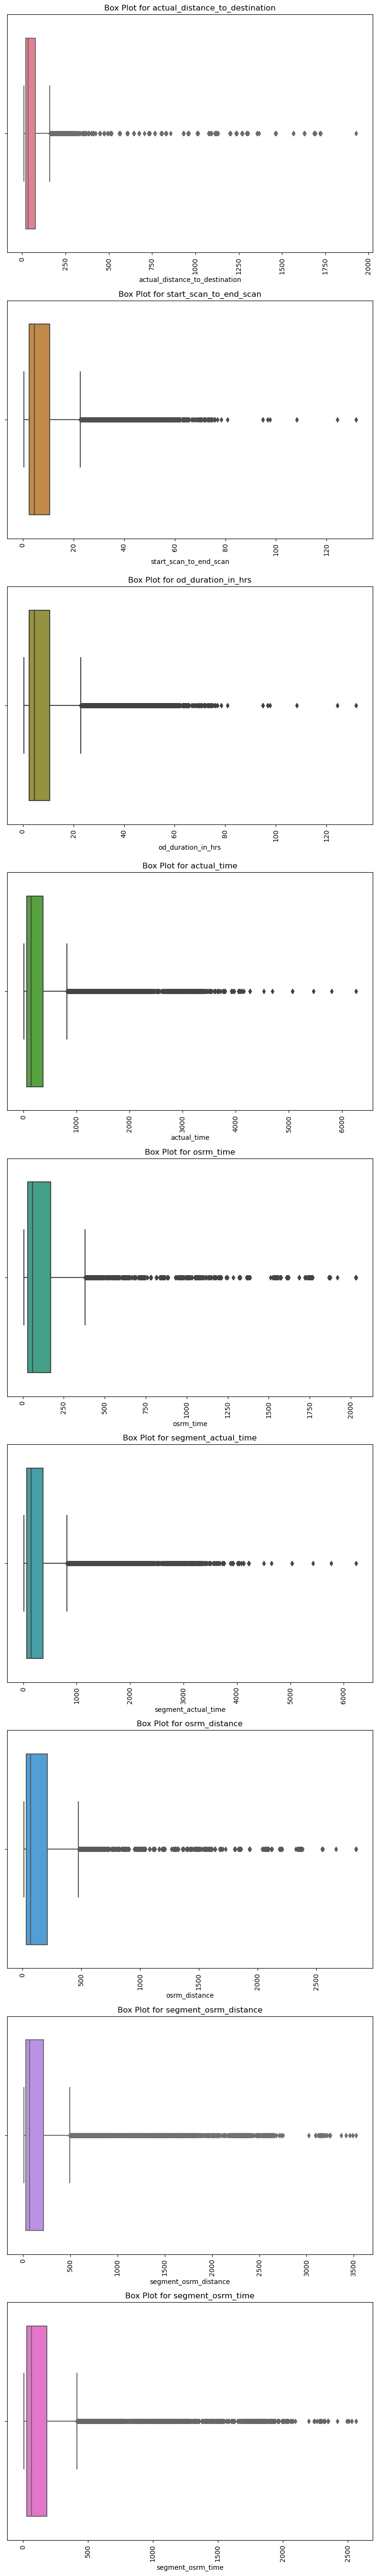

In [97]:
# Specify the numerical columns for box plots
numerical_columns = ['actual_distance_to_destination', 'start_scan_to_end_scan', 'od_duration_in_hrs', 'actual_time', 'osrm_time', 'segment_actual_time', 'osrm_distance', 'segment_osrm_distance', 'segment_osrm_time']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 6 * len(numerical_columns)))

# Define colors for each box plot
colors = sns.color_palette("husl", len(numerical_columns))

# Plot individual box plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=dh[column], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [84]:
# Assuming dh is your DataFrame and columns are specified
columns_to_check = ['actual_distance_to_destination', 'start_scan_to_end_scan', 'od_duration_in_hrs', 'actual_time', 'osrm_time', 'segment_actual_time', 'osrm_distance', 'segment_osrm_distance', 'segment_osrm_time']

# Iterate through each column
for column in columns_to_check:
    # Calculate IQR for the current column
    Q1 = dh[column].quantile(0.25)
    Q3 = dh[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = dh[(dh[column] < Q1 - 1.5 * IQR) | (dh[column] > Q3 + 1.5 * IQR)][column]
    
    # Print the column name and corresponding outliers
    print(f"Outliers for {column}:")
    print(outliers)
    print("\n" + "="*30 + "\n")  # Separate lines for clarity


Outliers for actual_distance_to_destination:
0         383.759164
2         237.439610
13        177.510885
39        163.989437
41       1078.198022
            ...     
14730    1010.705671
14750     173.510827
14764     447.680699
14769     236.488580
14795     267.020528
Name: actual_distance_to_destination, Length: 1998, dtype: float64


Outliers for start_scan_to_end_scan:
0        37.650000
2        65.550000
41       38.966667
43       38.366667
62       29.866667
           ...    
14716    24.266667
14730    34.183333
14750    44.333333
14769    73.500000
14795    36.333333
Name: start_scan_to_end_scan, Length: 1273, dtype: float64


Outliers for od_duration_in_hrs:
0        37.668497
2        65.572709
41       38.973003
43       38.383259
62       29.921330
           ...    
14716    24.298455
14730    34.190984
14750    44.352201
14769    73.513938
14795    36.368674
Name: od_duration_in_hrs, Length: 1266, dtype: float64


Outliers for actual_time:
0        1562.0
2      

In [85]:
# Example: One-hot encoding for 'route_type'
dh = pd.get_dummies(dh, columns=['route_type'], prefix='route_type')


In [89]:
dh.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,source_center,source_code,source_city,source_state,source_name,destination_center,destination_code,destination_city,destination_state,destination_name,actual_distance_to_destination,trip_creation_month,trip_creation_year,start_scan_to_end_scan,od_duration_in_hrs,actual_time,osrm_time,segment_actual_time,osrm_distance,segment_osrm_distance,segment_osrm_time,week,hour,date,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,IND462022AAA,H,Bhopal,Madhya Pradesh,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,HB,Gurgaon,Haryana,Gurgaon_Bilaspur_HB (Haryana),383.759164,September,2018,37.650000,37.668497,1562.0,743.0,1548.0,991.3523,1320.4733,1008.0,Wednesday,0,2018-09-12,False,True
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND572101AAA,I,Tumkur,Karnataka,Tumkur_Veersagr_I (Karnataka),IND562101AAA,D,Chikblapur,Karnataka,Chikblapur_ShntiSgr_D (Karnataka),24.644021,September,2018,3.000000,3.026865,143.0,68.0,141.0,85.1110,84.1894,65.0,Wednesday,0,2018-09-12,True,False
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,IND562132AAA,H,Bangalore,Karnataka,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,H,Chandigarh,Punjab,Chandigarh_Mehmdpur_H (Punjab),237.439610,September,2018,65.550000,65.572709,3347.0,1741.0,3308.0,2372.0852,2545.2678,1941.0,Wednesday,0,2018-09-12,False,True
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,None,Mumbai Hub (Maharashtra),Maharashtra,Mumbai Hub (Maharashtra),IND401104AAA,IP,Mumbai,Maharashtra,Mumbai_MiraRd_IP (Maharashtra),17.175274,September,2018,1.666667,1.674916,59.0,15.0,59.0,19.6800,19.8766,16.0,Wednesday,0,2018-09-12,True,False
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,D,Bellary,Karnataka,Bellary_Dc (Karnataka),IND583101AAA,D,Bellary,Karnataka,Bellary_Dc (Karnataka),41.317614,September,2018,11.950000,11.972484,341.0,117.0,340.0,146.7918,146.7919,115.0,Wednesday,0,2018-09-12,False,True


                 trip_uuid      data         trip_creation_time  \
0  trip-153671041653548748  training 2018-09-12 00:00:16.535741   
1  trip-153671042288605164  training 2018-09-12 00:00:22.886430   
2  trip-153671043369099517  training 2018-09-12 00:00:33.691250   
3  trip-153671046011330457  training 2018-09-12 00:01:00.113710   
4  trip-153671052974046625  training 2018-09-12 00:02:09.740725   

                                 route_schedule_uuid source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...  IND583101AAA   

  source_code               source_city    source_state  \
0           H                    Bhopal  Madhya Pradesh   
1           I                    Tumkur       Karnataka   

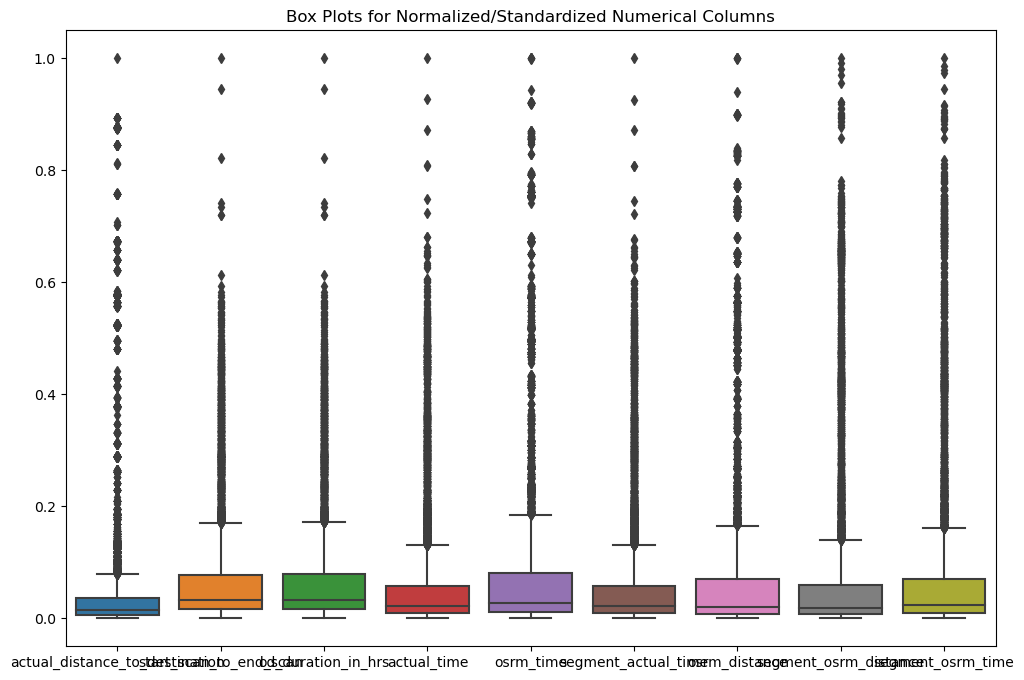

In [101]:
from sklearn.preprocessing import MinMaxScaler

# Specify the numerical columns for normalization/standardization
numerical_columns = ['actual_distance_to_destination', 'start_scan_to_end_scan', 'od_duration_in_hrs', 'actual_time', 'osrm_time', 'segment_actual_time', 'osrm_distance', 'segment_osrm_distance', 'segment_osrm_time']

# One-hot encoding for 'route_type'
#dh = pd.get_dummies(dh, columns=['route_type'], prefix='route_type')

# Normalize/Standardize numerical features using MinMaxScaler
scaler = MinMaxScaler()
dh[numerical_columns] = scaler.fit_transform(dh[numerical_columns])

# Display the modified DataFrame
print(dh.head())

# Plot box plots for the normalized/standardized numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=dh[numerical_columns])
plt.title('Box Plots for Normalized/Standardized Numerical Columns')
plt.show()


# `Business Insights:-`
1. Most trips use “Carting” (8K) transportation type as opposed to “FTL” (4K).
2. Bengaluru, Mumbai and Gurgaon are both the top source and destination cities. Bhiwandi,Delhi, Hyderabad, Chennai, Pune and Chandigarh are also some of the top contributors. So, we see that the Southern, Western and Northern corridors have the top contributing cities.
3. The top contributor states (both source and destination) are : Maharashtra is the highest, followed by Karnataka, Haryana, Tamil Nadu and Telengana, Delhi, Gujarat, UP and West Bengal. Again we see Western, Southern and Northern corridors have significant contribution to the traffic.
4. The greatest amount of time was spent in intra-state trips within Maharashtra,Karnataka,Tamil Nadu, Telengana, UP.
5. The greatest amount of distance was covered on inter-state trips in Karnaataka, Maharashtra,Tamil Nadu, Telengana and Andhra.
6. Similarly, the greatest amount of time was spent in intra-city trips within Bangalore, Mumbai,Hyderabad. A significant time is also spent in inter-city trips from Mumbai to Bhiwandi and Guragon to Delhi. These routes also contributed to the greatest amount of distance covered on trips.
7. OSRM seems to be calculating time taken as less than what time it actually takes. This might be because in actual scenario, there might be delays caused by unprecedented traffic or other delays.
8. OSRM seems to be calculating distance as less than what distance is actually covered. So,OSRM is underestimating time and overestimting the distance.
9. Route_type FTL in respect to distance and and time has greater mean as well as median yet FTL route type takes less time as well as distance for delivery.
10. Carting is prefered more in midnight orders.

# `Recommendations:-`
1. Since there is significant dfference between the time and distances calculated by OSRM with actual time and distances, it might make sense to revisit the information which is fed to the routing engine for trip planning. We need to check for discrrepancies with transporters nd to check if the routing engine is configured for optimum performance.
2. We have seen that the Western, Southern and Northern corridors have significant traffic, however, not so much in Eastern, Central and North Eastern corridors. Increasing the presence in these corridors is worth investigating.
3. There is a need to plan resources (specifically during regional festivities) in the states/cities which have highest contribution to traffic.
4. Road network can be taken into consideration to increase the number of FTL deliveries inter state and to connect the states where there is lower traffic.
5. Since “carting” is more popular as method of transport, the number of hubs could be increased in cities and states which have highest contribution to traffic.
6. Carting is preferred more however, FTL performs well in all aspects of time and ditance. So, FTL should be executed more in order to do a faster yet on time deleveries.